In [ ]:
import numpy as np
from PIL import Image
# import uuid
# import json
import os
from pprint import pprint
import random
import requests
from io import BytesIO

In [ ]:
!pip install -q transformers==4.36.0
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
# !pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 22.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:
x_data = np.load("/content/drive/My Drive/capstone_project/image_data/data_x.npy", allow_pickle = True)
y_data = np.load("/content/drive/My Drive/capstone_project/image_data/data_y.npy", allow_pickle = True)

In [ ]:
x_data = np.load("/content/drive/My Drive/capstone_personal/data_x.npy", allow_pickle = True)
y_data = np.load("/content/drive/My Drive/capstone_personal/data_y.npy", allow_pickle = True)

In [ ]:
cur_dir = os.getcwd()
# par_dir = "C:\\Users\Annie's Computer\Documents\capstone"
par_dir = os.path.join(cur_dir, "..")

x_data = np.load(os.path.join(par_dir, "data_files\data_x.npy"), allow_pickle = True)
y_data = np.load(os.path.join(par_dir, "data_files\data_y.npy"), allow_pickle = True)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Annie's Computer\AppData\Local\Temp\ipykernel_22420\422557815.py:5: SyntaxWarning: invalid escape sequence '\d'
  x_data = np.load(os.path.join(par_dir, "data_files\data_x.npy"), allow_pickle = True)
C:\Users\Annie's Computer\AppData\Local\Temp\ipykernel_22420\422557815.py:6: SyntaxWarning: invalid escape sequence '\d'
  y_data = np.load(os.path.join(par_dir, "data_files\data_y.npy"), allow_pickle = True)


In [ ]:
par_dir

"C:\\Users\\Annie's Computer\\Documents\\capstone\\jupyter_nb\\.."

In [ ]:
y_data.shape

(529, 1)

In [ ]:
y_data[400:410]

array([['plastic_bottle'],
       ['plastic_bottle'],
       ['plastic_bottle'],
       ['plastic_bottle'],
       ['plastic_bottle'],
       ['plastic_bottle'],
       ['plastic_bottle'],
       ['plastic_bottle'],
       ['plastic_bottle'],
       ['plastic_bottle']], dtype=object)

In [ ]:
y_data_num = y_data

y_data_num[y_data_num == 'aluminum_can'] = 0
y_data_num[y_data_num == 'paper_cup'] = 1
y_data_num[y_data_num == 'boxes'] = 2
y_data_num[y_data_num == 'soda_can'] = 3
y_data_num[y_data_num == 'plastic_bottle'] = 4
y_data_num[y_data_num == 'glass_bottle'] = 5

In [ ]:
os.path.join(par_dir, "data_files/data_x.npy")

"C:\\Users\\Annie's Computer\\Documents\\capstone\\jupyter_nb\\..\\data_files/data_x.npy"

In [ ]:
par_dir

"C:\\Users\\Annie's Computer'Documents\\capstone"

In [ ]:
x_data.shape

(529, 128, 128, 3)

In [ ]:
model_id = "llava-hf/llava-1.5-7b-hf"

processor = AutoProcessor.from_pretrained(model_id)

model = LlavaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
    load_in_4bit=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
im = Image.fromarray(np.uint8(x_data[100]))

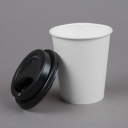

In [ ]:
im

In [ ]:
prompt = f"USER: <image>\nWhat is the waste object in this image, output just the name\nASSISTANT:"
inputs = processor(prompt, im, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=10, do_sample=False, temperature = 0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

('ER:  \n'
 'What is the waste object in this image, output just the name\n'
 'ASSISTANT: Coffee cup')


In [ ]:
instruc = f"Given the following instructions for recycling in Palm Desert: \n {pd_instruc}"

In [ ]:
prompt = f"USER: <image>\n{instruc}\nWhat is in the image and can it be recycled?\nASSISTANT:"
inputs = processor(prompt, im, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=100, do_sample=False, temperature =0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

('ER:  \n'
 'Given the following instructions for recycling in Palm Desert: \n'
 ' What Items Can Be Recycled\n'
 '\n'
 'Paper\t\n'
 '- White and colored paper\n'
 '- Phone books\n'
 '- Magazines\n'
 '- Junk Mail\n'
 '- Envelopes\n'
 '- File folders\n'
 '- Cardboard (flattened)\n'
 '- Cartons (milk, juice, & broth)\n'
 '- Books (remove hard covers or binding)\n'
 '- Cardboard boxes, e.g. cereal, etc.\n'
 '\n'
 'Plastic\n'
 '- Styrofoam packing blocks\n'
 '- Plastic medicine bottles (empty)\n'
 '- Plastic bottles numbered 1-7 (remove plastic film or wrap)\n'
 '\n'
 'Metal & Glass\n'
 '- Aluminum, steel, and tin cans\n'
 '- Clean aluminum foil\n'
 '- Glass bottles and jars (remove lids)\n'
 'Say what is in the image and if it can be recycled?\n'
 'ASSISTANT: The image features a white cup sitting next to a black coffee '
 'mug. Both items can be recycled, as they are made of different materials. '
 'The white cup is typically made of paper or a paper-based material, which '
 'can be recy

In [ ]:
output_str = processor.decode(output[0][2:], skip_special_tokens=True)

output_idx = output_str.index("ASSISTANT") + 11
print(output_str[output_idx:])

Yes


In [ ]:
items = {0:'aluminum_can', 1:'paper_cup', 2:'boxes', 3:'soda_can', 4:'plastic_bottle', 5:'glass_bottle'}

recyc = {0:'yes', 1: 'no', 2:'yes', 3:'yes', 4:'yes', 5:'yes'}

palm_desert_sen = {0 : "This is an aluminum can. It can be recycled in Palm Desert. Please dispense it in the nearest recycling can.",
                   1 : "This is a paper cup. It cannot be recycled in Palm Desert. Please dispense it in the nearest trash can.",
                   2 : "This is a cardboard box. It can be recycled in Palm Desert. Please dispense it in the nearest recycling can.",
                   3 : "This is a soda can. It can be recycled in Palm Desert. Please dispense it in the nearest recycling can.",
                   4 : "This is a plastic bottle. It can be recycled in Palm Desert. Please remove plastic film or wrap and dispense it in the nearest recycling can.",
                   5 : "This is a glass bottle. It can be recycled in Palm Desert. Please throw the lid in the trash and dispense the bottle in the nearest recycling can."}

cook_county_sen = {0 : "This is an aluminum can. It can be recycled in Cook County. Please dispense it in the nearest recycling can.",
                   1 : "This is a paper cup. It cannot be recycled in Cook County. Please dispense it in the nearest trash can.",
                   2 : "This is a cardboard box. It can be recycled in Cook County. Please dispense it in the nearest recycling can.",
                   3 : "This is a soda can. It can be recycled in Cook County. Please dispense it in the nearest recycling can.",
                   4 : "This is a plastic bottle. It can be recycled in Cook County. Please make sure the bottle is clean and dry and put the cap back on before throwing it in the nearest recycling can.",
                   5 : "This is a glass bottle. It can be recycled in Palm Desert. Please dispense the bottle in the nearest recycling can."}

In [ ]:
items[0]

'aluminum_can'

In [ ]:
with open("palm_desert_recycling_instruc.txt", "r") as file:
  pd_instruc = file.read()

with open("cook_county_recycling_instruc.txt", "r", encoding = 'utf-8') as file:
  cc_instruc = file.read()

In [ ]:
y_data_num = y_data

y_data_num[y_data_num == 'aluminum_can'] = 0
y_data_num[y_data_num == 'paper_cup'] = 1
y_data_num[y_data_num == 'boxes'] = 2
y_data_num[y_data_num == 'soda_can'] = 3
y_data_num[y_data_num == 'plastic_bottle'] = 4
y_data_num[y_data_num == 'glass_bottle'] = 5

In [ ]:
y_data.shape

(529, 1)

In [ ]:
true = []
pred = []

x_data_200 = x_data[100:200]
y_data_200 = y_data_num[100:200]

for i in range(y_data_200.shape[0]):
  img = Image.fromarray(np.uint8(x_data_200[i]))

  loc_choice = random.randint(0, 1)

  item_class = y_data_200[i][0]

  item_name = items[item_class]

  recyc_class = recyc[item_class]

  if loc_choice == 0:
    target_sen = palm_desert_sen[item_class]
    instruc = f"Given the following instructions for recycling in Palm Desert: \n {pd_instruc}"
  else:
    target_sen = cook_county_sen[item_class]
    instruc = f"Given the following instructions for recycling in Cook County: \n {cc_instruc}"

  true_array = [item_name, recyc_class, target_sen]
  true.append(true_array)

  prompts = ["USER: <image>\nWhat is the waste object in this image, output just the name\nASSISTANT:",
             "USER: <image>\nIs this recyclable. Choose yes or no\nASSISTANT:",
             f"USER: <image>\n{instruc}\nWhat is in the image and can it be recycled?\nASSISTANT:"]

  pred_array = []

  for j in range(len(prompts)):
    prompt = prompts[j]

    inputs = processor(prompt, img, return_tensors='pt').to(0, torch.float16)

    output = model.generate(**inputs, max_new_tokens=10, do_sample=False, temperature = 0)

    output_str = processor.decode(output[0][2:], skip_special_tokens=True)

    output_idx = output_str.index("ASSISTANT") + 11
    answer_str = output_str[output_idx:]

    pred_array.append(answer_str)

  pred.append(pred_array)


np.save("/content/drive/My Drive/capstone_annie/true_10_10_200.npy", true)
np.save("/content/drive/My Drive/capstone_annie/pred_10_10_200.npy", pred)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:228: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  wa

##### creating sentence output

In [ ]:
true = []
pred = []

x_data_480 = x_data[361:480]
y_data_480 = y_data_num[361:480]

for i in range(y_data_480.shape[0]):
  img = Image.fromarray(np.uint8(x_data_480[i]))

  loc_choice = random.randint(0, 1)

  item_class = y_data_480[i][0]

  item_name = items[item_class]

  recyc_class = recyc[item_class]

  if loc_choice == 0:
    target_sen = palm_desert_sen[item_class]
    instruc = f"Given the following instructions for recycling in Palm Desert: \n {pd_instruc}"
  else:
    target_sen = cook_county_sen[item_class]
    instruc = f"Given the following instructions for recycling in Cook County: \n {cc_instruc}"

  true_array = [target_sen]
  true.append(true_array)

  # prompts = ["USER: <image>\nWhat is the waste object in this image, output just the name\nASSISTANT:",
  #            "USER: <image>\nIs this recyclable. Choose yes or no\nASSISTANT:",
  #            f"USER: <image>\n{instruc}\nWhat is in the image and can it be recycled?\nASSISTANT:"]

  pred_array = []

  # for j in range(len(prompts)):
  prompt = f"USER: <image>\n{instruc}\nWhat is in the image and can it be recycled?\nASSISTANT:"

  inputs = processor(prompt, img, return_tensors='pt').to(0, torch.float16)

  output = model.generate(**inputs, max_new_tokens=100, do_sample=False, temperature = 0)

  output_str = processor.decode(output[0][2:], skip_special_tokens=True)

  output_idx = output_str.index("ASSISTANT") + 11
  answer_str = output_str[output_idx:]

  pred_array.append(answer_str)

  pred.append(pred_array)


np.save("/content/drive/My Drive/capstone_annie/true_sen_10_22_480.npy", true)
np.save("/content/drive/My Drive/capstone_annie/pred_10_22_480.npy", pred)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:


output = model.generate(**inputs, max_new_tokens=25, temperature = 0.0)

output_str = processor.decode(output[0][2:], skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
np.save("/content/drive/My Drive/capstone_annie/true_sen_10_22_180.npy", true[:-1])
np.save("/content/drive/My Drive/capstone_annie/pred_10_22_180.npy", pred)

In [ ]:
len(true)

32

In [ ]:
np.save("/content/drive/My Drive/capstone_annie/true_sen_10_22_331.npy", true[:-1])
np.save("/content/drive/My Drive/capstone_annie/pred_10_22_331.npy", pred)

In [ ]:
np.load("/content/drive/My Drive/capstone_annie/pred_10_10_400.npy").shape

(154, 3)

### prompt with summary

In [ ]:
class_2_pth = '/content/drive/MyDrive/capstone_annie/single_aluminum_cans/'

test_im_pth = os.path.join(class_2_pth, "Image_182.png")
test_im_2 = Image.open(test_im_pth)

In [ ]:
class_1_pth = '/content/drive/MyDrive/capstone_annie/single_paper_cups/'

test_im_pth = os.path.join(class_1_pth, "Image_229.png")
test_im_1 = Image.open(test_im_pth)

In [ ]:
prompt = f"USER: <image>\nSummary of palm desert recycling instructions: {'aluminum cans can be recycled'}. Is item in image recyclable Choose yes or no\nASSISTANT:"
inputs = processor(prompt, test_im_2, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=10, do_sample=False, temperature =0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:228: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


('ER:  \n'
 'Summary of palm desert recycling instructions: aluminum cans can be '
 'recycled. Is item in image recyclable Choose yes or no\n'
 'ASSISTANT: Yes')


In [ ]:
prompt = f"USER: <image>\nSummary of palm desert recycling instructions: {'paper cups are not in acceptable recyclable list, do not recycle'}. Is item in image recyclable Choose yes or no\nASSISTANT:"
inputs = processor(prompt, test_im_1, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=10, do_sample=False, temperature =0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


('ER:  \n'
 'Summary of palm desert recycling instructions: paper cups are not in '
 'acceptable recyclable list, do not recycle. Is item in image recyclable '
 'Choose yes or no\n'
 'ASSISTANT: No')


In [ ]:
prompt = f"USER: <image>\nSummary of palm desert recycling instructions: {'paper cups are not in acceptable recyclable list, do not recycle'}. Is this item able to be reyclced: {'no'}. Please give instructions on how to recycle item in image:\nASSISTANT:"
inputs = processor(prompt, test_im_1, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=50, do_sample=False, temperature =0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

('ER:  \n'
 'Summary of palm desert recycling instructions: paper cups are not in '
 'acceptable recyclable list, do not recycle. Is this item able to be '
 'reyclced: no. Please give instructions on how to recycle item in image:\n'
 'ASSISTANT: The image shows a white paper cup, which is not considered an '
 'acceptable recyclable item. Therefore, it is not recommended to recycle this '
 'paper cup. Instead, it should be disposed of in a regular waste bin.')


# material output experiments


In [ ]:
### experiments with whole dataset

# true = []
pred = []

x_data_500 = x_data[450:]
y_data_500 = y_data_num[450:]

for i in range(y_data_500.shape[0]):
  img = Image.fromarray(np.uint8(x_data_500[i]))

  # loc_choice = random.randint(0, 1)

  # item_class = y_data_150[i][0]

  # item_name = items[item_class]

  # recyc_class = recyc[item_class]

  # if loc_choice == 0:
  #   target_sen = palm_desert_sen[item_class]
  #   instruc = f"Given the following instructions for recycling in Palm Desert: \n {pd_instruc}"
  # else:
  #   target_sen = cook_county_sen[item_class]
  #   instruc = f"Given the following instructions for recycling in Cook County: \n {cc_instruc}"

  # true_array = [target_sen]
  # true.append(true_array)

  # prompts = ["USER: <image>\nWhat is the waste object in this image, output just the name\nASSISTANT:",
  #            "USER: <image>\nIs this recyclable. Choose yes or no\nASSISTANT:",
  #            f"USER: <image>\n{instruc}\nWhat is in the image and can it be recycled?\nASSISTANT:"]

  pred_array = []

  # for j in range(len(prompts)):
  prompt = f"USER: <image>\nWhat is this waste item and what material is the waste item made from, output a one phrase answer, don't consider the brand\nASSISTANT:"

  inputs = processor(prompt, img, return_tensors='pt').to(0, torch.float16)

  output = model.generate(**inputs, max_new_tokens=50, do_sample=False, temperature = 0)

  output_str = processor.decode(output[0][2:], skip_special_tokens=True)

  output_idx = output_str.index("ASSISTANT") + 11
  answer_str = output_str[output_idx:]

  pred_array.append(answer_str)

  pred.append(pred_array)


# np.save("/content/drive/My Drive/capstone_annie/true_sen_10_27_150.npy", true)
np.save("/content/drive/My Drive/capstone_annie/pred_sen_10_27_500.npy", pred)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
pred

[['Plastic bottle'],
 ['Cigarette butt'],
 ['Plastic bottle'],
 ['Alcohol bottle'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['A glass jar.'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['Alcohol bottle'],
 ['Plastic bottle'],
 ['Beer bottle'],
 ['Plastic bottle'],
 ['Beer bottle'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['A plastic bottle.'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['Alcohol bottle'],
 ['Plastic bottle'],
 ['Beer bottle'],
 ['A small plastic container.'],
 ['Plastic bottle'],
 ['A cigarette lighter.'],
 ['Bottle'],
 ['A cigarette butt made from tobacco.'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['Beer bottle'],
 ['Alcohol bottle'],
 ['Alcohol bottle'],
 ['A plastic bottle.'],
 ['Alcohol bottle'],
 ['Plastic'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['A small piece of plastic.'],
 ['Alcohol bottle'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['Plastic bottle'],
 ['Alcohol bottle'],
 ['Plastic bottle'],
 ['Plas

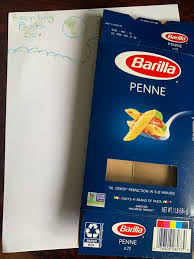

In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRd8EEVWuIQuPAAGXar1pw6xtw_IwmrkbThTA&s"
# url = "https://atlas-content1-cdn.pixelsquid.com/assets_v2/236/2360273967266141189/jpeg-600/G03.jpg"
response = requests.get(url)
url_im = Image.open(BytesIO(response.content))
url_im

In [ ]:
response = requests.get("https://atlas-content1-cdn.pixelsquid.com/assets_v2/236/2360273967266141189/jpeg-600/G03.jpg")
url_im = Image.open(BytesIO(response.content))
url_im

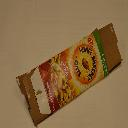

In [ ]:
im = Image.fromarray(np.uint8(x_data[177]))
im

In [ ]:
prompt = f"USER: <image>\nWhat is this waste item and what is the waste item made of, output only the describing words with the material\nASSISTANT:"
inputs = processor(prompt, im, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=50, do_sample=False, temperature = 0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

('ER:  \n'
 'What is this waste item and what is the waste item made of, output only the '
 'describing words with the material\n'
 'ASSISTANT: The waste item is a plastic bottle.')


In [ ]:
prompt = f"USER: <image>\nWhat is this waste item and what material is the waste item made from, output a one phrase answer\nASSISTANT:"
inputs = processor(prompt, url_im, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=50, do_sample=False, temperature = 0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

('ER:  \n'
 'What is this waste item and what material is the waste item made from, '
 'output a one phrase answer\n'
 'ASSISTANT: Empty wine bottle made from glass.')


In [ ]:
prompt = f"USER: <image>\nWhat is this waste item and what material is the waste item made from, output a one phrase answer, don't consider the brand\nASSISTANT:"
inputs = processor(prompt, url_im, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=50, do_sample=False, temperature = 0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

('ER:  \n'
 'What is this waste item and what material is the waste item made from, '
 "output a one phrase answer, don't consider the brand\n"
 'ASSISTANT: A blue box made from cardboard.')


In [ ]:
prompt = f"USER: <image>\nWhat is this waste item and what material is the waste item made from, output a one phrase answer\nASSISTANT:"
inputs = processor(prompt, im, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=50, do_sample=False, temperature = 0)
pprint(processor.decode(output[0][2:], skip_special_tokens=True))

('ER:  \n'
 'What is this waste item and what material is the waste item made from, '
 'output a one phrase answer\n'
 'ASSISTANT: A used paper towel.')


In [ ]:
get_example_sen = np.load('/content/drive/My Drive/capstone_annie/pred_10_22_180.npy')

In [ ]:
get_example_sen[10]

array(['Coffee cup', 'Yes', 'The image features a cup of tea, which is'],
      dtype='<U51')